In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GDAnalysisAC import LinDiscAnalysis
from GDAnalysisAC import utilsAC

In [2]:
data1 = pd.read_csv('data1.csv', header=None)
data1.head()

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1


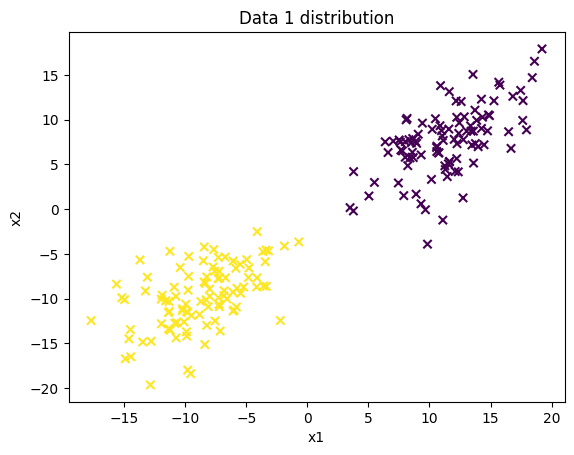

In [3]:
plt.scatter(data1[0], data1[1], marker='x', c=data1[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data 1 distribution')
plt.show()

In [4]:
data1_x = data1.iloc[:, :-1]
data1_y = data1.iloc[:, -1]

data1_y.value_counts()

2
1    100
0    100
Name: count, dtype: int64

In [5]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(data1_x, data1_y, train_ratio=0.7)
# train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
# test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [6]:
lda_ac = LinDiscAnalysis()
lda_ac.fit(train_x, train_y)
pred1 = lda_ac.predict(test_x)
# pred1
pf = utilsAC.get_performance_measure(test_y, pred1)
print(pf)

{'tp': 25, 'tn': 35, 'fp': 0, 'fn': 0, 'precision': 1.0, 'recall': 1.0, 'spec': 1.0, 'f1': 1.0}


In [7]:
lda_ac.get_params()

array([ 0.27709858, -0.12543142, -0.05894097])

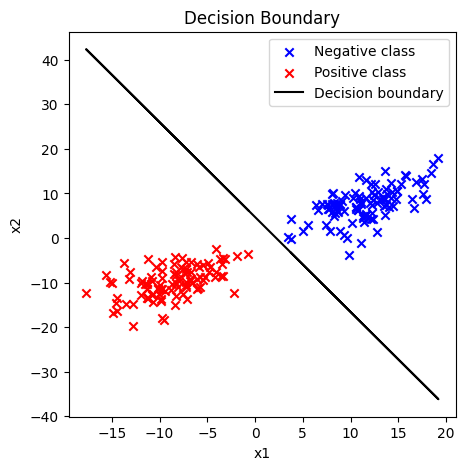

In [8]:
utilsAC.plot_dec_bound(data1_x, data1_y, lda_ac.get_params())

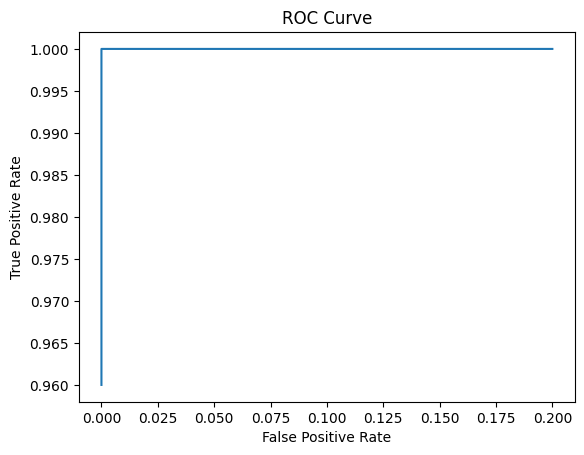

In [20]:
thresh = np.arange(-1, 1, 0.001)
pred1_prob = lda_ac.predict(test_x, prob=True)
utilsAC.plot_roc(test_y, pred1_prob, thresh=thresh)